# REAL RACING 3 CARS - DATA ANALYSIS

# PART 3 - REVISION 5 - FINAL

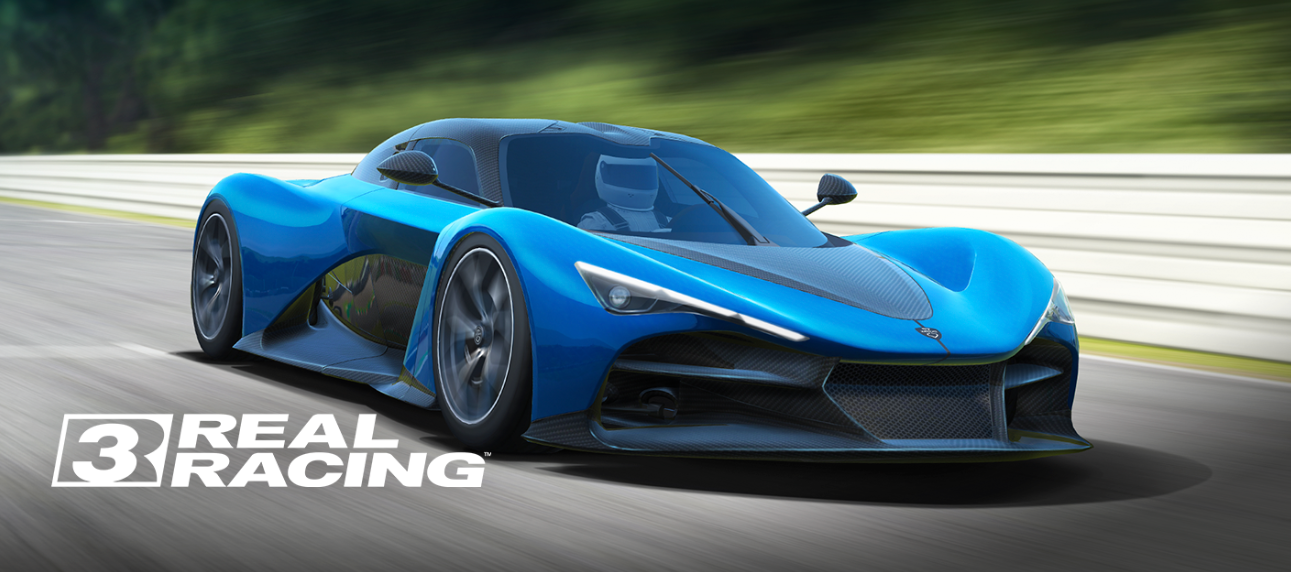

## **Welcome to my 3rd Part of Data Analysis for Real Racing 3 Cars!**

In the **first two analyses part**, we've performed lots of data analyses and revealed many expected and interesting results that provided us great insights about the cars.

Now, in the **3rd part**, my focus will be on **data visualization**. Ana a general belief, a figure could tell us hundreds or even thousands of words, right?

As always, let's load the necessary modules initially. Again, we're going to use the cars roster from **game version 14.0 (final)**:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

**Important!:**  GitHub may cause some tables to have unusual resizing and/or print weird characters when the dollar sign `$` appeared in the dataset during rendering. To avoid this issue, all values in `Price` that contain `$` should be changed before the analyses begin.

In [2]:
rr3_df = pd.read_csv('real_racing_3_cars_v14_0.csv')
rr3_series = pd.read_csv('real_racing_3_all_series_v14_0.csv')
pd.set_option('display.max_columns', None)

In [3]:
for i in range(len(rr3_df)):
    if type(rr3_df.loc[i, 'Price']) != float and rr3_df.loc[i, 'Price'][-1] == '$':
        s = rr3_df.loc[i, 'Price'][:-1] + 'dollar'
        rr3_df.loc[i, 'Price'] = s

_Let's check the dataset to make sure everything is loaded correctly:_

In [4]:
rr3_df.head(10)

Manufacturer             Model    PR  Top Speed  Acceleration  Braking  \
0        Acura        NSX (2017)  46.7        306          3.10     31.7   
1        Acura        NSX Type S  48.9        307          2.90     32.0   
2        Acura           NSX GT3  65.2        274          3.02     29.6   
3        Acura            ARX-05  78.5        322          2.80     25.6   
4        Acura            ARX-06  84.5        335          2.60     23.2   
5   Alfa Romeo     Giulietta TCR  34.5        241          5.30     29.3   
6   Alfa Romeo                4C  29.4        257          4.34     30.2   
7   Alfa Romeo         155 V6 TI  38.0        274          4.60     29.0   
8       Apollo  Intensa Emozione  84.0        335          2.65     26.2   
9        Ariel          Atom 3.5  44.5        249          2.70     30.5   

   Grip Class Type  Series            Price  Service Time  Service Cost  \
0  1.09     S   M4       2         450 Gold           180          1665   
1  1.10     S   M4       1         600 Gold           180          1812   
2  1.65     R   MR       2         750 Gold           180          1990   
3  1.76     R   MR       1         850 Gold           180          1997   
4  1.78     R   MR       2  2650000 Mdollar           180             0   
5  1.30     R   FF       1         180 Gold           180          1332   
6  1.05     P   MR       2         200 Gold           180          1415   
7  1.35     R   F4       2         300 Gold           180          1665   
8  2.00     S   MR       3        1100 Gold           180          2062   
9  1.00     S   RR       2   255000 Rdollar           140          1170   

  Is Available Has Exclusive Events In Motorsports In Road Collection  \
0          Yes                   No             No                Yes   
1          Yes                   No             No                Yes   
2          Yes                   No            Yes                 No   
3          Yes                   No            Yes                 No   
4          Yes                   No            Yes                 No   
5          Yes                   No             No                Yes   
6          Yes                   No             No                Yes   
7          Yes                  Yes             No                Yes   
8          Yes                  Yes             No                Yes   
9          Yes                   No             No                Yes   

  In Main Career In Season 1 In Season 2 In Season 3 In Season 4 In Season 5  
0             No         Yes         Yes          No          No          No  
1             No          No          No         Yes          No          No  
2             No          No          No          No          No          No  
3             No          No          No          No          No          No  
4             No          No          No         Yes          No         Yes  
5             No          No          No          No          No          No  
6             No         Yes         Yes          No          No          No  
7             No         Yes          No          No          No          No  
8             No         Yes          No         Yes          No          No  
9            Yes          No          No          No          No          No

In [5]:
rr3_df.tail(10)

Manufacturer                            Model     PR  Top Speed  \
530       Toyota  Camry (Joe Gibbs Racing - 2021)   45.4        298   
531       Toyota       Camry (23XI Racing - 2021)   45.4        301   
532       Toyota                 Camry TRD (2022)   45.3        293   
533       Toyota                 Camry TRD (2023)   46.7        296   
534       Toyota           GR Yaris Rally1 Hybrid   43.2        201   
535       Toyota              TS040 Hybrid (2014)   89.4        394   
536   Volkswagen                  Golf GTI (2021)   15.4        249   
537   Volkswagen                         XL Sport   23.7        270   
538   Volkswagen                             ID.R  107.5        269   
539        Zenvo                       Aurora Tur   81.2        451   

     Acceleration  Braking  Grip Class Type  Series            Price  \
530          3.45     29.3  1.12     R   FR       1  2150000 Mdollar   
531          3.42     29.3  1.10     R   FR       1  2150000 Mdollar   
532          3.44     29.3  1.10     R   FR       1  2150000 Mdollar   
533          3.34     29.0  1.12     R   FR       1  2150000 Mdollar   
534          2.70     29.7  1.37     R   F4       2  2250000 Mdollar   
535          2.50     26.2  1.82     R   M4       4         950 Gold   
536          5.10     33.8  0.97     P   FF       2         300 Gold   
537          5.50     32.0  1.25     R   M4       2         350 Gold   
538          2.25     19.8  2.45     R   MR       2        1100 Gold   
539          2.30     31.1  1.45     S   M4       2         900 Gold   

     Service Time  Service Cost Is Available Has Exclusive Events  \
530           180             0           No                   No   
531           180             0           No                   No   
532           180             0           No                   No   
533           180             0           No                   No   
534           260             0          Yes                   No   
535           325          2192          Yes                   No   
536           180          1377          Yes                   No   
537           180          1415          Yes                   No   
538           180          2062          Yes                  Yes   
539           180          1997          Yes                  Yes   

    In Motorsports In Road Collection In Main Career In Season 1 In Season 2  \
530            Yes                 No             No          No          No   
531            Yes                 No             No          No          No   
532            Yes                 No             No          No         Yes   
533            Yes                 No             No          No          No   
534            Yes                 No             No          No          No   
535            Yes                Yes            Yes          No          No   
536             No                Yes             No         Yes          No   
537             No                Yes             No         Yes          No   
538             No                Yes             No         Yes          No   
539             No                Yes             No          No          No   

    In Season 3 In Season 4 In Season 5  
530          No          No          No  
531          No          No          No  
532          No          No          No  
533         Yes          No          No  
534         Yes          No          No  
535          No          No          No  
536          No          No          No  
537          No          No          No  
538          No         Yes          No  
539          No         Yes          No

### _**OK, great! Let's begin with the 3rd part...**_

## Counts of Career Series Availability for Cars

The last analysis done in the 2nd part was about generating **a bar graph** to show the breakdown of **number of cars distributed for total career series availability**. Let me redo everything here, but with some changes for significantly better understandability (focusing on dark colors):

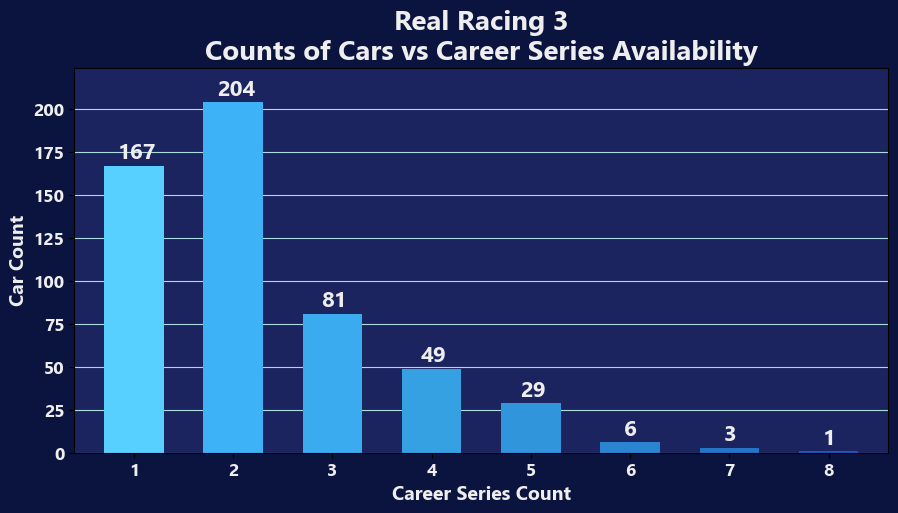

In [6]:
# plt.style.use('seaborn')
plt.rcParams["font.sans-serif"] = "Segoe UI"
plt.rcParams['figure.facecolor'] = '#0b143f'
plt.rcParams['axes.facecolor'] = '#1b245f'
plt.rcParams['grid.color'] = '#1b245f'
text_c = '#eeeeee'
array_series = rr3_df['Series'].value_counts().sort_index()
c = ['#58d0ff','#3db2f6','#39abee','#35a1e3','#3195dc','#2b84d0', '#2674c8', '#1d57c1']
plt.figure(figsize=(10.5,5))
plt.bar(range(1,9), array_series, color=c, width=0.6, zorder=2)
plt.axis([0.4, 8.6, 0, 224])
for i in range(len(array_series)):
    if array_series.iloc[i] >= 100:    vsh = 0.84
    elif array_series.iloc[i] >= 10:   vsh = 0.89
    else:  vsh = 0.94
    plt.text(i+vsh, array_series.iloc[i]+4, array_series.iloc[i], fontsize=16, fontweight='bold', color=text_c)
plt.title('Real Racing 3\nCounts of Cars vs Career Series Availability', fontsize=20, fontweight='bold', color=text_c)
plt.xlabel('Career Series Count', fontsize=14, fontweight='bold', color=text_c)
plt.ylabel('Car Count', fontsize=14, fontweight='bold', color=text_c)
plt.xticks(fontsize=13, color=text_c, fontweight='bold')
plt.yticks(fontsize=13, color=text_c, fontweight='bold')
plt.grid(axis='y', color='#aadddd', zorder=1)
plt.show()

With a visualization like this, it becomes easier to interpret the results!

Here, there are **167** cars that can be driven **only in 1 career series**. Surprisingly, cars with **2 career series** are the most common (204)! As seen in the figure above, this number certainly gets decreased (like elbow curve) with higher number of career series availability.

Let's remind ourselves which cars were eligible to drive in at least 6 or more different career series (there should be **10 cars** if you remember):

In [7]:
rr3_df[rr3_df['Series'] >= 6]

Manufacturer                        Model    PR  Top Speed  Acceleration  \
35          Audi                 R8 LMS Ultra  50.5        315           3.5   
164      Ferrari                    LaFerrari  66.0        349           2.9   
330   Koenigsegg                      Agera R  78.3        439           2.9   
342  Lamborghini              Huracán LP610-4  50.7        325           3.2   
345  Lamborghini            Aventador LP700-4  50.9        349           2.9   
382      McLaren                      MP4-12C  48.3        330           2.9   
421       Nissan    Skyline GT-R V-Spec (R34)   2.5        257           5.8   
451       Pagani                      Zonda R  74.0        351           2.7   
477      Porsche           918 Spyder Concept  60.2        322           3.0   
478      Porsche  918 Spyder Weissach Package  70.4        344           2.5   

     Braking  Grip Class     Type  Series           Price  Service Time  \
35      30.8  1.30     R       MR       7  366300 Rdollar           160   
164     27.7  1.40     S       MR       7        790 Gold           295   
330     29.6  1.60     S       MR       6        800 Gold           300   
342     30.8  1.17     S       M4       6        450 Gold            90   
345     30.5  1.06     S       M4       6  597700 Rdollar           195   
382     30.5  1.06     S       MR       6         65 Gold           140   
421     36.6  0.88     P  FR(RHD)       6   35600 Rdollar             9   
451     29.3  1.62     S       MR       7        400 Gold           280   
477     30.2  1.40     S       M4       8  845000 Rdollar           215   
478     28.7  1.45     S       MR       6        700 Gold           225   

     Service Cost Is Available Has Exclusive Events In Motorsports  \
35           1302          Yes                  Yes             No   
164          2037          Yes                  Yes             No   
330          2062          Yes                   No             No   
342          1377          Yes                   No             No   
345          1480          Yes                   No             No   
382          1192          Yes                   No             No   
421           460          Yes                  Yes             No   
451          1965          Yes                  Yes             No   
477          1605          Yes                   No             No   
478          1647          Yes                   No             No   

    In Road Collection In Main Career In Season 1 In Season 2 In Season 3  \
35                 Yes            Yes          No          No          No   
164                Yes            Yes          No         Yes          No   
330                Yes            Yes         Yes          No          No   
342                Yes             No          No         Yes          No   
345                Yes            Yes          No          No          No   
382                Yes            Yes          No          No          No   
421                Yes            Yes          No          No          No   
451                Yes            Yes          No         Yes          No   
477                Yes            Yes          No         Yes          No   
478                Yes             No          No          No          No   

    In Season 4 In Season 5  
35           No          No  
164          No          No  
330          No          No  
342          No          No  
345          No          No  
382          No          No  
421          No          No  
451          No          No  
477          No          No  
478         Yes          No

And, among these 10 cars, **Porsche 918 Spyder Concept** is the only one with **8 different** career series availability! Here, I'd like to reveal which series this car can be driven:

In [8]:
rr3_series[(rr3_series['Manufacturer'] == 'Porsche') & (rr3_series['Model'] == '918 Spyder Concept')]

Main Tab     Group                 Series Manufacturer  \
435   Road Collection  Season 2         Power Struggle      Porsche   
559   Road Collection    Pro/Am   V8 Performance Brawl      Porsche   
854   Road Collection     Elite     Porsche Ascendancy      Porsche   
868   Road Collection     Elite         Supercar Clash      Porsche   
906   Road Collection    Legend        Supercar Elites      Porsche   
925   Road Collection    Legend        Spider Showdown      Porsche   
958   Road Collection    Legend  Hybrid Hypercar Clash      Porsche   
1026  Road Collection    Legend  Concept vs Production      Porsche   

                   Model  
435   918 Spyder Concept  
559   918 Spyder Concept  
854   918 Spyder Concept  
868   918 Spyder Concept  
906   918 Spyder Concept  
925   918 Spyder Concept  
958   918 Spyder Concept  
1026  918 Spyder Concept

Having this knowledge in one sheet is great when you want to drive this Porsche! Here, it is perfectly matched for series in **Legend** tier where possible, but also can be encountered in **2nd Season**, **Pro/Am** and **Elite** bonus series as well, although it couldn't receive its exclusive series.

As I said before, **Nissan Skyling GT-R V-Spec (R34)** is a nice car for starters because it's easy to buy and upgrade despite its stats; has very short servicing time and its own exclusive series! Here, let's display this Nissan's career series:

In [9]:
rr3_series[(rr3_series['Manufacturer'] == 'Nissan') & (rr3_series['Model'] == 'Skyline GT-R V-Spec (R34)')]

Main Tab             Group  \
530   Road Collection           Amateur   
534   Road Collection           Amateur   
539   Road Collection           Amateur   
548   Road Collection            Pro/Am   
943   Road Collection            Legend   
1080  Road Collection  Exclusive Series   

                                                 Series Manufacturer  \
530                                Street-Spec Skirmish       Nissan   
534                           6 Cyl Annihilation Series       Nissan   
539                           Global Production Pursuit       Nissan   
548                                          Road Flair       Nissan   
943                                     Road To Le Mans       Nissan   
1080  Nissan Skyline GT-R V-Spec (R34) (Exclusive Se...       Nissan   

                          Model  
530   Skyline GT-R V-Spec (R34)  
534   Skyline GT-R V-Spec (R34)  
539   Skyline GT-R V-Spec (R34)  
548   Skyline GT-R V-Spec (R34)  
943   Skyline GT-R V-Spec (R34)  
1080  Skyline GT-R V-Spec (R34)

Yeah, this car is ideal especially for **Amateur** series, but interestingly, it can even be driven in the special event series **Road To Le Mans**!

In addition, allow me to list the career series of cars with the total of **7** (Audi R8 LMS Ultra, Ferrari LaFerrari, Pagani Zonda R), then we'll continue with the next section:

In [10]:
rr3_series[(rr3_series['Manufacturer'] == 'Audi') & (rr3_series['Model'] == 'R8 LMS Ultra')]

Main Tab             Group                                Series  \
655   Road Collection            Expert                         Accolade Open   
660   Road Collection            Expert                        V10 Grand Open   
720   Road Collection            Master                     German Grand Tour   
723   Road Collection            Master                           Grip Fiends   
827   Road Collection             Elite             International Power-Match   
976   Road Collection            Legend                         MotorFiesta 1   
1125  Road Collection  Exclusive Series  Audi R8 LMS Ultra (Exclusive Series)   

     Manufacturer         Model  
655          Audi  R8 LMS Ultra  
660          Audi  R8 LMS Ultra  
720          Audi  R8 LMS Ultra  
723          Audi  R8 LMS Ultra  
827          Audi  R8 LMS Ultra  
976          Audi  R8 LMS Ultra  
1125         Audi  R8 LMS Ultra

In [11]:
rr3_series[(rr3_series['Manufacturer'] == 'Ferrari') & (rr3_series['Model'] == 'LaFerrari')]

Main Tab             Group                                Series  \
735   Road Collection            Master                      Redline: Origins   
930   Road Collection            Legend                         Zenith Series   
961   Road Collection            Legend                 Hybrid Hypercar Clash   
967   Road Collection            Legend                         MotorFiesta 1   
1031  Road Collection            Legend                         Italian Prime   
1036  Road Collection            Legend                   Festival of Ferrari   
1153  Road Collection  Exclusive Series  Ferrari LaFerrari (Exclusive Series)   

     Manufacturer      Model  
735       Ferrari  LaFerrari  
930       Ferrari  LaFerrari  
961       Ferrari  LaFerrari  
967       Ferrari  LaFerrari  
1031      Ferrari  LaFerrari  
1036      Ferrari  LaFerrari  
1153      Ferrari  LaFerrari

In [12]:
rr3_series[(rr3_series['Manufacturer'] == 'Pagani') & (rr3_series['Model'] == 'Zonda R')]

Main Tab             Group                             Series  \
422   Road Collection          Season 2                      Pagani Parade   
912   Road Collection            Legend                       Speed Demons   
928   Road Collection            Legend                      Zenith Series   
1033  Road Collection            Legend                      Italian Prime   
1040  Road Collection            Legend                   Essential Pagani   
1044  Road Collection            Legend                  Breakneck Legends   
1175  Road Collection  Exclusive Series  Pagani Zonda R (Exclusive Series)   

     Manufacturer    Model  
422        Pagani  Zonda R  
912        Pagani  Zonda R  
928        Pagani  Zonda R  
1033       Pagani  Zonda R  
1040       Pagani  Zonda R  
1044       Pagani  Zonda R  
1175       Pagani  Zonda R

This should also give us an important inference that cars from motorsports disciplines might not have high number of career series as theirs are bound to just **one discipline** (additional one might come from their exclusive series or invitational series for Formula 1).

## The Car Classes

Following the same task, let's generate another **bar graph** for counting **the car classes** individually:

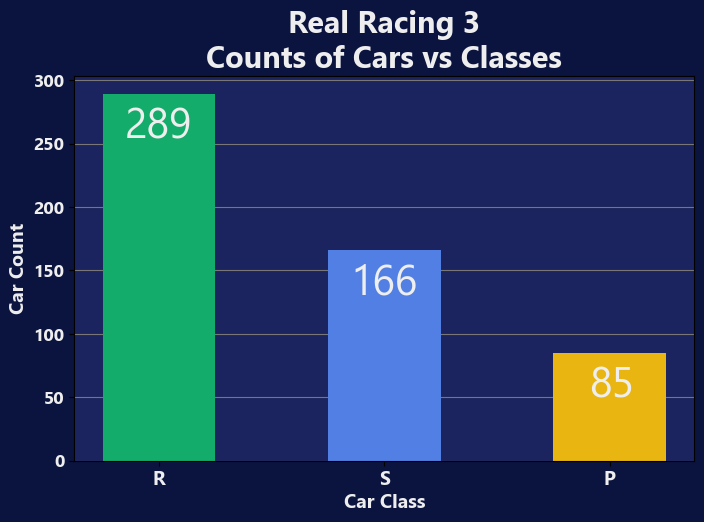

In [13]:
plt.figure(figsize=(8,5))
class_count = rr3_df['Class'].value_counts()
plt.bar(class_count.index, class_count.values, width=0.5, color=['#14ac6a', '#527fe3', '#e9b510'], zorder=2)
plt.title('Real Racing 3\nCounts of Cars vs Classes', fontsize=22, fontweight='bold', color=text_c)
for i in range(len(class_count)):
    if class_count[i] >= 100:   plt.text(i-0.15, class_count[i]-35, class_count[i], color=text_c, fontsize=30)
    else:   plt.text(i-0.09, class_count[i]-35, class_count[i], color=text_c, fontsize=30)
plt.xlabel('Car Class', fontsize=14, fontweight='bold', color=text_c)
plt.ylabel('Car Count', fontsize=14, fontweight='bold', color=text_c)
plt.xticks(fontsize=14, color=text_c, fontweight='bold')
plt.yticks(fontsize=13, color=text_c, fontweight='bold')
plt.grid(axis='y', color='#777777', zorder=1)
plt.show()

As we've seen in the 2nd part of analysis, **R (Race) class** cars have the most appearance in the car roster (with **289**). Considering the current status of the game, the _Motorsports_ series still contain lots of cars that belong to that class and some of them could also be found in the _Road Collection_ career series.

About the rest, there are **166 S (Super) class** cars, which they are generally more expensive than **P-class** cars that their numbers are significantly less than other classes, **only 85**.

## The Purchase Types

How about the count of **purchase type** for all cars in the final version 14.0?

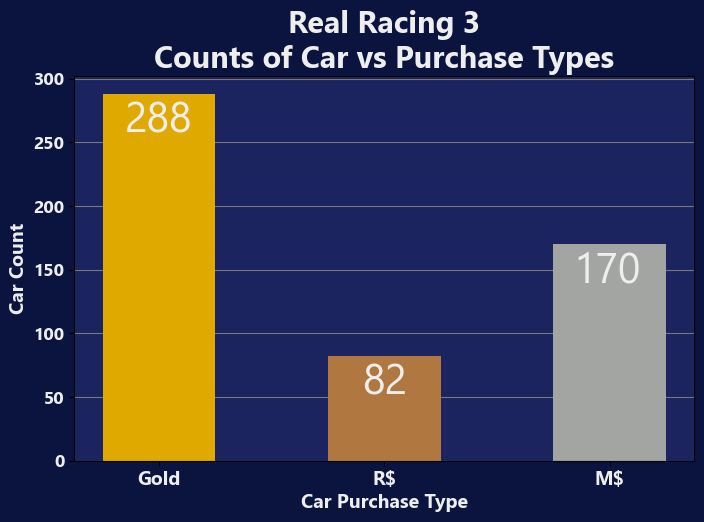

In [14]:
gold_c = rr3_df['Price'].str.contains('Gold').values.sum()
rdollar_c = rr3_df['Price'].str.contains('Rdollar').values.sum()
mdollar_c = rr3_df['Price'].str.contains('Mdollar').values.sum()
plt.figure(figsize=(8,5))
plt.bar(['Gold', 'R\$', 'M\$'], [gold_c, rdollar_c, mdollar_c], width=0.5, color=['#e0a900', '#b07741', '#a2a5a1'], zorder=2)
plt.text(-0.15, gold_c-30, gold_c, color=text_c, fontsize=30)
plt.text(0.9, rdollar_c-30, rdollar_c, color=text_c, fontsize=30)
plt.text(1.84, mdollar_c-30, mdollar_c, color=text_c, fontsize=30)
plt.title('Real Racing 3\nCounts of Car vs Purchase Types', fontsize=22, fontweight='bold', color=text_c)
plt.xlabel('Car Purchase Type', fontsize=14, fontweight='bold', color=text_c)
plt.ylabel('Car Count', fontsize=14, fontweight='bold', color=text_c)
plt.xticks(fontsize=14, color=text_c, fontweight='bold')
plt.yticks(fontsize=13, color=text_c, fontweight='bold')
plt.grid(axis='y', color='#777777', zorder=1)
plt.show()

According to the figure above, we can imply that there are lots of cars purchasable with **Gold, exceeding 250**! When you progress further in the career series (especially bonus ones and those released for separate seasons), know that you'll encounter more cars that **require Gold to buy** and enter those series.

In addition, the cars that are selected as **the prize car** in each round of the Seasonal events, could actually be bought with Gold, but the choice is locked because the game wants you to earn **Victory Points** to own the prize car for free. Well, these ones can be encountered again in different rounds for another chance to bring them to your garage (consider yourself lucky if already own them, so you get **a bunch of gold** as the alternative prize).

With the introduction of **2019 Season Formula 1 cars**, we've been introduced with the **M\$** currency type, which has its own daily limit (**250,000 M\$** maximum, but quadrupled to **1,000,000 M\$** as the game's shutdown draws near). Up until the latest version, many more cars with this purchase type have joined to the game, and now the number has been increased up to **170**!

About **R\$**, we are all getting used to the game with the cars that are purchased with this currency type, especially in the earlier career series. However, the choices for new cars with R\$ are becoming non-existent when progressed through the series, and even with the release of new versions up until the final version, **the number did not change at all, still 82!**

## Combining These Features

Well, for a more complex operation, I'd like to **combine these two features**: The count is performed by comparing **the classes against their purchase types**.

To make it work, I have to create another column to store only the purchase type as string (e.g. only `Rdollar`, `Gold` and `Mdollar`).

**Here, a pivot table will be useful here:**

In [15]:
def get_purchase_type(x):
    if type(x) != float and x[-7:] == 'Rdollar':    return 'Rdollar'
    elif type(x) != float and x[-4:] == 'Gold':     return 'Gold'
    elif type(x) != float and x[-7:] == 'Mdollar':  return 'Mdollar'
rr3_df['Purchase Type'] = rr3_df['Price'].apply(get_purchase_type)

In [16]:
cls_pt_table = rr3_df.pivot_table(index=['Class'], columns=['Purchase Type'], values=['Model'], aggfunc='count').fillna(0)
cls_pt_table.astype(int)

Model                
Purchase Type  Gold Mdollar Rdollar
Class                              
P                57       0      28
R               101     170      18
S               130       0      36

**That's more like it!** That table gave us much more insights for _the classes against the purchase types of the cars!_ 

Compare this with the bar graphs above; do these numbers match when summed vertically and horizontally?

Meanwhile, this cross-counting technique reveals another fact: Cars that are purchasable with **M\$** are all from **R class!** Plus, **Gold purchase-type** is dominant for **R** and **S** classes. However, with the release of new cars from **R** class in the course of time, **M\$** has surpassed Gold in terms of numbers!

_Now, time to represent them together with a nice visualization:_

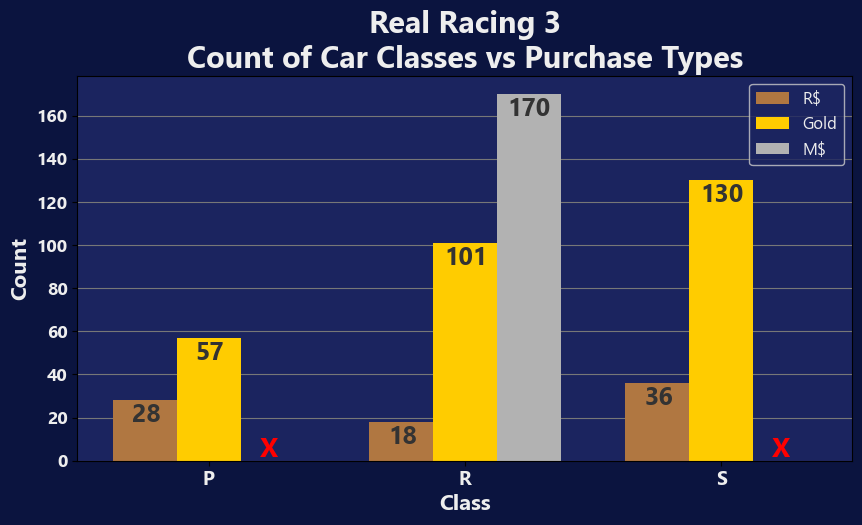

In [17]:
x = np.array([0, 0.5, 1])
fig, ax = plt.subplots(figsize=(10,5))
width = 0.125
ax.bar(x - width, cls_pt_table.loc[:,('Model','Rdollar')].values, width, label='R$', color='#b07741', zorder=2)
ax.bar(x, cls_pt_table.loc[:,('Model','Gold')].values, width, label='Gold', color='#ffcc00', zorder=2)
ax.bar(x + width, cls_pt_table.loc[:,('Model','Mdollar')].values, width, label='M$', color='#b2b2b2', zorder=2)
for i in range(3):
    if cls_pt_table.iloc[i,0] >= 100:    vsh = -0.04
    else:    vsh = -0.027
    plt.text(i/2+vsh, cls_pt_table.iloc[i,0]-10, int(cls_pt_table.iloc[i,0]), fontsize=18, fontweight='bold', color='#333333')      
    plt.text(i/2-0.15, cls_pt_table.iloc[i,2]-10, int(cls_pt_table.iloc[i,2]), fontsize=18, fontweight='bold', color='#333333')  
    if cls_pt_table.iloc[i,1] == 0:
        plt.text(i/2+0.1, cls_pt_table.iloc[i,1]+2, "X", fontsize=20, fontweight='bold', color='r')
    else:
        plt.text(i/2+0.082, cls_pt_table.iloc[i,1]-10, int(cls_pt_table.iloc[i,1]), fontsize=18, 
                 fontweight='bold', color='#333333')
plt.title('Real Racing 3\nCount of Car Classes vs Purchase Types', fontsize=22, fontweight='bold', color=text_c)
plt.xlabel('Class', fontsize=16, fontweight='bold', color=text_c)
plt.ylabel('Count', fontsize=16, fontweight='bold', color=text_c)
plt.xticks([0, 0.5, 1.0], ['P', 'R', 'S'], fontsize=14, color=text_c, fontweight='bold')
plt.yticks(fontsize=13, color=text_c, fontweight='bold')
plt.grid(axis='y', color='#777777', zorder=1)
plt.legend(fontsize=12, labelcolor=text_c)
plt.show()

_This looks awesome! We successfully converted the above table into a bar graph with multiple values in it!_

By examining the table and the graph, our implication should be that you must have **lots of Gold** and **lots of M\$** in your wallet to be able to enjoy the races with **R-class** cars! There are **101** and **170** of them, respectively. For **S-class**, Gold is still dominating (which is **130**). For **P-class**, a gap is being formed between R\$ and Gold (**28** vs **57**).

## Class vs Drive Types

Alternatively, now I want to do the same for **Class** against **Drive Type** together. However, some _data wrangling_ is needed for **Type**, such that I have to get rid of `(RHD)` and `(MHD)` that are found in the corresponding column as they are not necessary:

In [18]:
rr3_df['Type'] = rr3_df['Type'].apply(lambda x: x[:2])

**This should look good. Now, let's carry this out:**

In [19]:
cls_dt_table = rr3_df.pivot_table(index=['Class'], columns=['Type'], values=['Model'], aggfunc='count', margins=True).fillna(0)
cls_dt_table.astype(int)

Model                              
Type     F4  FF   FR  M4   MR R4  RR  All
Class                                    
P        13   9   50   2    6  0   5   85
R         8   2   83  13  169  0  14  289
S         5   1   39  39   60  3  19  166
All      26  12  172  54  235  3  38  540

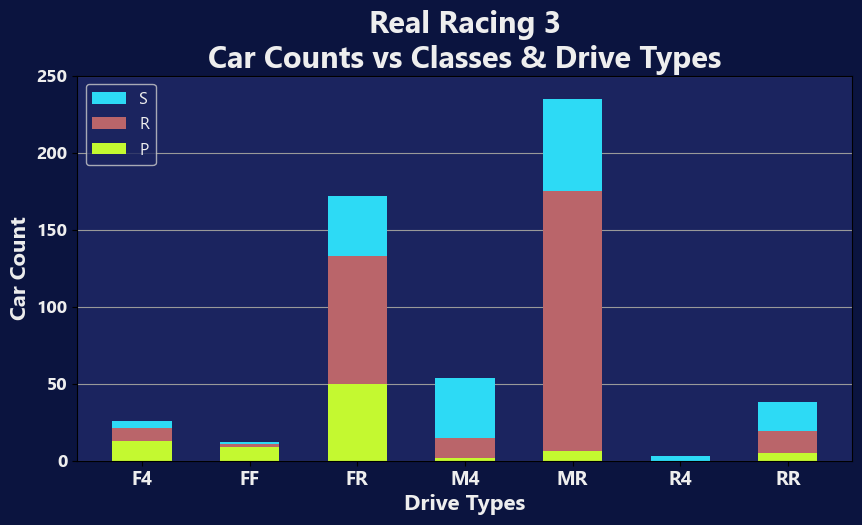

In [20]:
width = 0.25
table_columns = cls_dt_table.columns.levels[1][0:7]
w = 0.55
plt.figure(figsize=(10,5))
plt.axis([-0.6, 6.6, 0, 250])
plt.bar(table_columns, cls_dt_table.loc['S'][:7], bottom=(cls_dt_table.loc['P'][:7]+cls_dt_table.loc['R'][:7]), 
        label='S', color='#2ddaf5', width=w, zorder=2)
plt.bar(table_columns, cls_dt_table.loc['R'][:7], bottom=cls_dt_table.loc['P'][:7], label='R', color='#ba656a', 
        width=w, zorder=2)
plt.bar(table_columns, cls_dt_table.loc['P'][:7], label='P', color='#c4f930', width=w, zorder=2)
plt.title('Real Racing 3\nCar Counts vs Classes & Drive Types', fontsize=22, fontweight='bold', color=text_c)
plt.xlabel('Drive Types', fontsize=16, fontweight='bold', color=text_c)
plt.ylabel('Car Count', fontsize=16, fontweight='bold', color=text_c)
plt.xticks(fontsize=14, color=text_c, fontweight='bold')
plt.yticks(fontsize=13, color=text_c, fontweight='bold')
plt.legend(fontsize=12, loc='upper left', labelcolor=text_c)
plt.grid(axis='y', color='#999999', zorder=1)
plt.show()

_Here you are! This time **a stacked bar** is a great visualization for this purpose._

From the pivot table and the figure above, it seems that **MR-drive type** possesses the most density **(235)** among all cars in Real Racing 3 (v14.0), moderately more than **FR-drive type** (where the gap is **63**). In addition, **R-class** is favored for both drive types.

About the highest count of class/drive type combination, we can come across **169** cars as **R-class with MR-type** (confirm this with your own eyes!).

Last but not the least, it is clear to see that the rest are significantly lower (less than 50, except **M4** class) than the aforementioned drive types.

Moreover, these combinations are the rarest ones you could drive: **S-class/FF**, **R-class/FF**, **P-class/M4** and **S-class/R4**.

## Manufacturers with Numbers of Cars

In the 2nd part of the analysis, we've counted **how many cars all existing manufacturers had** in RR3, but only output these with more than 10. This also included the manufacturers that are represented with **only a single car**...

Now, let's get the big picture to see everything, with **horizontal bar** figure! There are three things to consider in advance:

* **Mercedes-Benz** and **Mercedes-AMG** were combined as **Mercedes** to avoid the distinction.
* **Formula 1** and **Formula E** take place here although they are not considered as manufacturers, rather _motorsport disciplines_ at all.
* The discontinued cars from **NASCAR**, **Supercars** and **Formula E** under various manufacturers are also included.

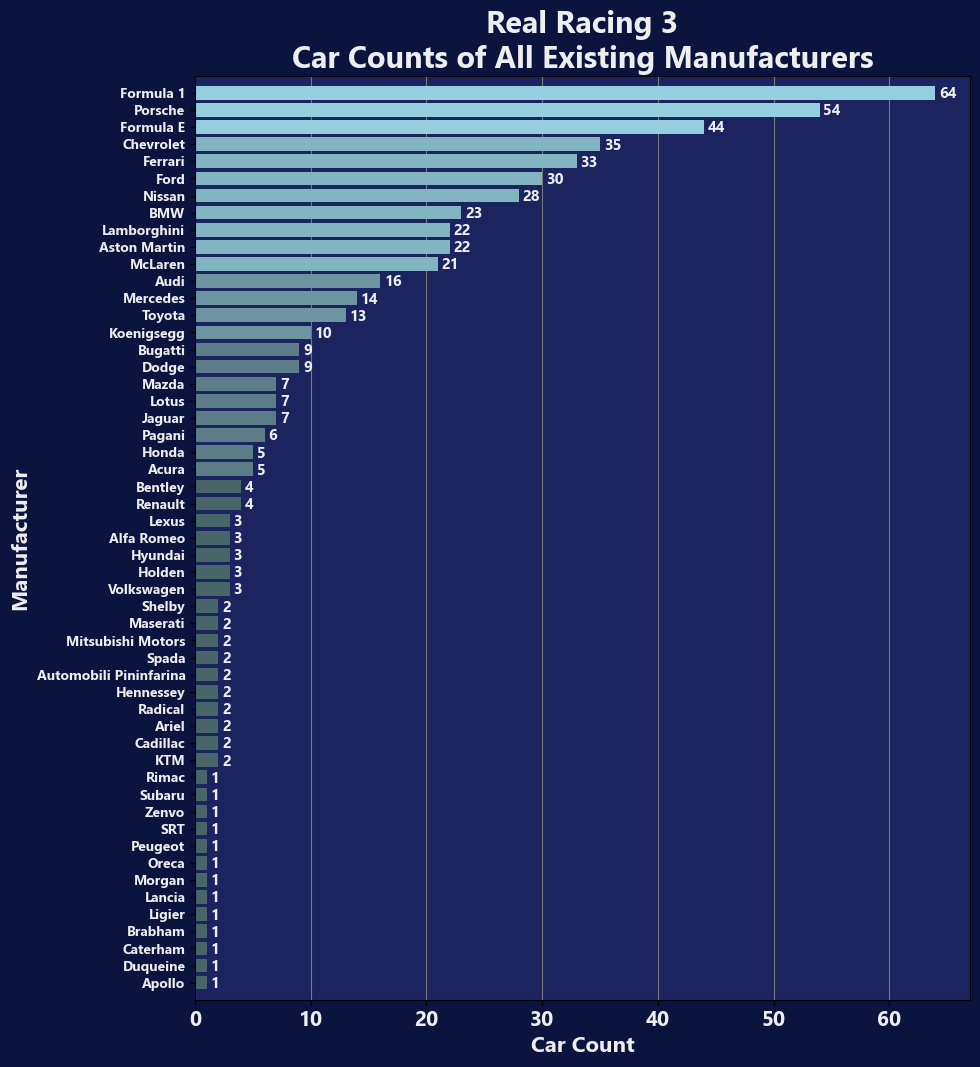

In [21]:
rr3_df['Manufacturer'].replace('Mercedes-Benz', 'Mercedes', inplace=True)
rr3_df['Manufacturer'].replace('Mercedes-AMG', 'Mercedes', inplace=True)
manu_count = rr3_df['Manufacturer'].value_counts(ascending=True)
c = []
for v in manu_count:
    if v >= 40:    c.append('#95cede')
    elif v >= 20:  c.append('#82b4c2')
    elif v >= 10:  c.append('#6c95a1')
    elif v >= 5:   c.append('#5b7d87')
    else:    c.append('#476669')
plt.figure(figsize=(10,12))
plt.axis([0, 67, -1, 53])
plt.barh(manu_count.index, manu_count, color=c, zorder=2)
for i in range(len(manu_count)):
    plt.text(manu_count[i]+0.32, i-0.3, manu_count[i], fontsize=11, fontweight='bold', color=text_c)
plt.title("Real Racing 3\nCar Counts of All Existing Manufacturers", fontsize=22, fontweight='bold', color=text_c)
plt.xlabel("Car Count", fontsize=16, fontweight='bold', color=text_c)
plt.ylabel("Manufacturer", fontsize=16, fontweight='bold', color=text_c)
plt.xticks(fontsize=15, color=text_c, fontweight='bold')
plt.yticks(fontsize=10, color=text_c, fontweight='bold')
plt.grid(axis='x', color='#777777', zorder=1)
plt.show()

From this big picture, in the final version 14.0, **Formula 1** alone encompasses the most cars with **64**, thanks to the distribution among six consecutive seasons **(2019-2024)**, including **Mercedes-AMG GT R Safety Car** and other F1-chassis ones **(Debut Car, R3 Esports Challenger & Valente)**!

**Formula E** contained **44** different cars among different seasons, with the representation of single one or all teams included for separate seasons. That means, these two motorsports series totally have **over 100 cars** to choose and drive!

If we exclude Formula 1 and Formula E together, there is no doubt that **Porsche** is the most crowded manufacturer in the game, with over **50 different cars** can be driven (was confirmed in previous part of the analyses, too).

Well, the runner-up is still **Chevrolet** with 35. Then, **Ferrari**, **Ford**, **Nissan**, **BMW**, **Lamborghini**, **Aston Martin** and **McLaren** with greater than or equal to 20.

Next, several popular manufacturers can be seen: **Audi**, **Mercedes**, **Toyota** and **Koenigsegg**; having more than 10 cars in common.

Besides, as already known in the previous part, these manufacturers were represented with only **one** cars in Real Racing 3: **Rimac**, **Subaru**, **Zenvo**, **SRT**, **Peugeot**, **Oreca**, **Morgan**, **Lancia**, **Ligier**, **Brabham**, **Caterham**, **Duqueine** and **Apollo**.

Lastly, we encounter other specific manufacturers; for example, those with **two** cars: **Shelby**, **Maserati**, **Mitsubishi**, **Spada**, **Automobili Pinanfarina**, **Hennessey**, **Radical**, **Ariel**, **Cadillac** and **KTM**.

## Histograms of Car Stats

As we continue our visualizations for Real Racing 3, we already know that all car stats are stored as numeric values: **Top Speed**, **Acceleration**, **Braking** and **Grip**.

Keep in mind that those values were stored as if all cars stayed in their stock configuration, i.e. no upgrades were applied.

_**How about creating the histograms of each stat category?**_

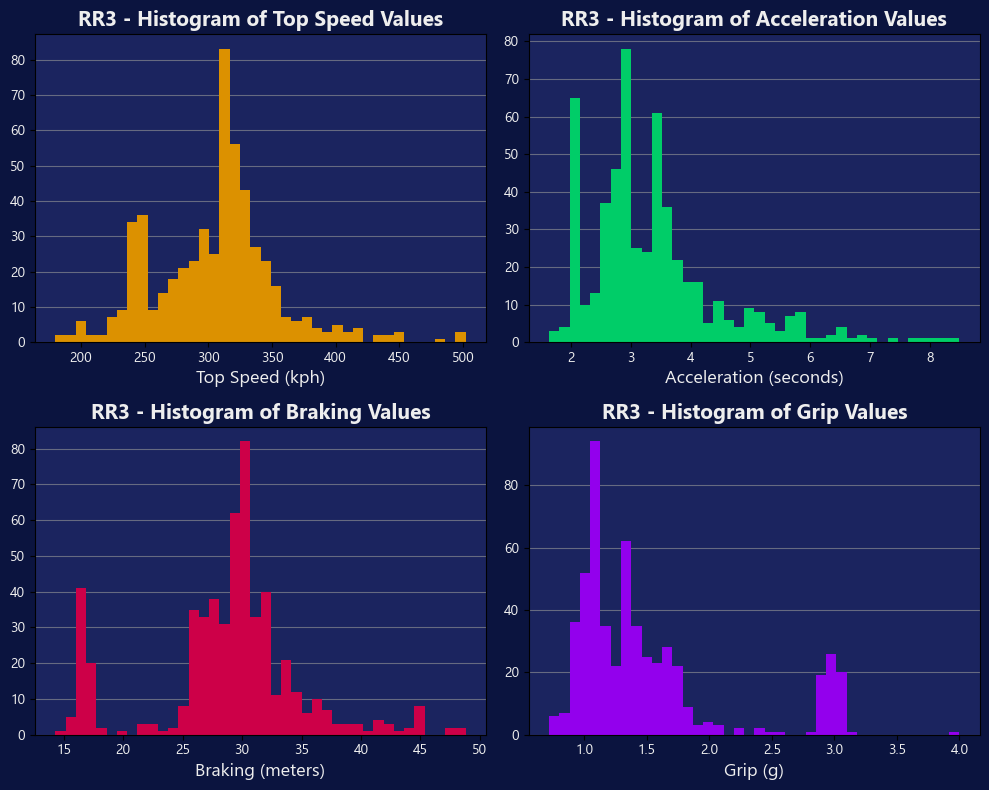

In [22]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.title("RR3 - Histogram of Top Speed Values", fontsize=15, fontweight='bold', color=text_c)
plt.hist(rr3_df['Top Speed'], bins=40, color='#dc9100', zorder=2)
plt.xlabel('Top Speed (kph)', fontsize=13, color=text_c)
plt.xticks(color=text_c)
plt.yticks(color=text_c)
plt.grid(axis='y', alpha=0.6, color='#999999', zorder=1)
plt.subplot(2,2,2)
plt.title("RR3 - Histogram of Acceleration Values", fontsize=15, fontweight='bold', color=text_c)
plt.hist(rr3_df['Acceleration'], bins=40, color='#00cd68', zorder=2)
plt.xlabel('Acceleration (seconds)', fontsize=13, color=text_c)
plt.grid(axis='y', alpha=0.6, color='#999999', zorder=1)
plt.xticks(color=text_c)
plt.yticks(color=text_c)
plt.subplot(2,2,3)
plt.title("RR3 - Histogram of Braking Values", fontsize=15, fontweight='bold', color=text_c)
plt.hist(rr3_df['Braking'], bins=40, color='#cd0048', zorder=2)
plt.xlabel('Braking (meters)', fontsize=13, color=text_c)
plt.grid(axis='y', alpha=0.6, color='#999999', zorder=1)
plt.xticks(color=text_c)
plt.yticks(color=text_c)
plt.subplot(2,2,4)
plt.title("RR3 - Histogram of Grip Values", fontsize=15, fontweight='bold', color=text_c)
plt.hist(rr3_df['Grip'], bins=40, color='#9300ed', zorder=2)
plt.xlabel('Grip (g)', fontsize=13, color=text_c)
plt.grid(axis='y', alpha=0.6, color='#999999', zorder=1)
plt.xticks(color=text_c)
plt.yticks(color=text_c)
plt.tight_layout()
plt.show()

**They look awesone!** Here are the remarkable observations from these outcomes:

* **Top Speed:** somewhat resembles a thin bell curve; over **100 cars** have top speeds of around **320 kph**.
* **Acceleration:** Lots of values are aligned to the left side; thus cars with acceleration of **less than 4 seconds** are much more frequent. Several peak points can be seen with values approximately around **2.0**, **3.0** and **3.5** seconds.
* **Braking:** The overall shape is again likely a bell curve, but more irregular than Top Speed, due to another visible local bell curve on the left side. It looks like **more than 200 cars** have braking distances values of **28-32 meters**. This local maxima of the left could come from **Formula 1** cars as their braking values are distributed around **17 meters**.
* **Grip:** We come across values that lie to the left side again; it is very likely to see lots of cars with **0.9-1.7 g** cornering capability in a **broad interval**; those with **around 3.0 g** should come from **Formula 1 cars** again.

## More Histograms

In addition to these histograms, let's create more, including **PR**, **Service Cost** and **Service Time**:

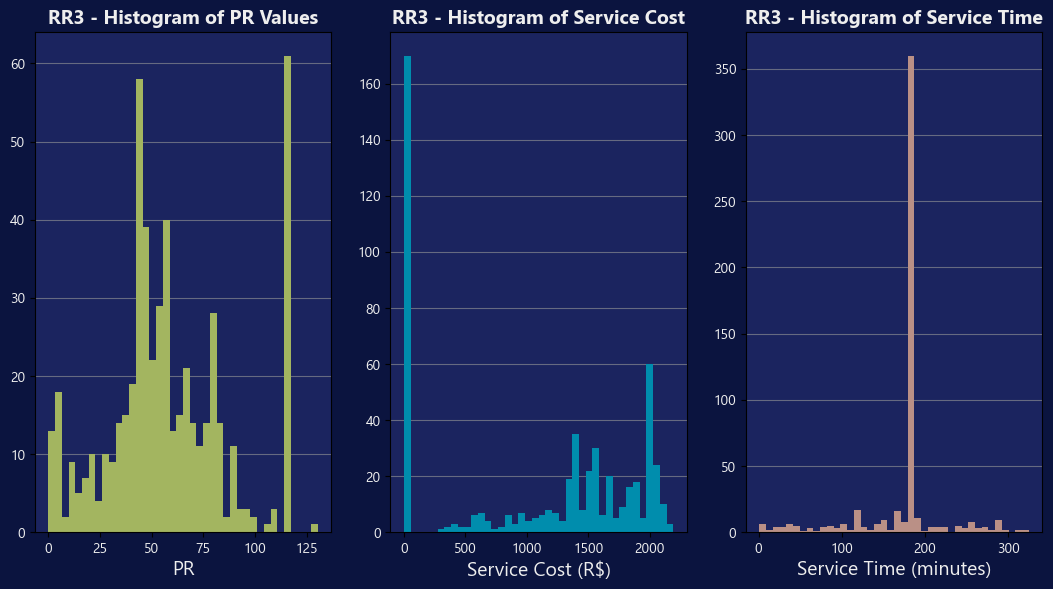

In [23]:
plt.figure(figsize=(13,6.5))
plt.subplot(1,3,1)
plt.title("RR3 - Histogram of PR Values", fontsize=14, fontweight='bold', color=text_c, zorder=2)
plt.hist(rr3_df['PR'], bins=40, color='#a3b560', zorder=2)
plt.xlabel("PR", fontsize=14, color=text_c)
plt.xticks(color=text_c)
plt.yticks(color=text_c)
plt.grid(axis='y', alpha=0.6, color='#999999', zorder=1)
plt.subplot(1,3,2)
plt.title("RR3 - Histogram of Service Cost", fontsize=14, fontweight='bold', color=text_c, zorder=2)
plt.hist(rr3_df['Service Cost'], bins=40, color='#008dad', zorder=2)
plt.xlabel("Service Cost (R$)", fontsize=14, color=text_c)
plt.xticks(color=text_c)
plt.yticks(color=text_c)
plt.grid(axis='y', alpha=0.6, color='#999999', zorder=1)
plt.subplot(1,3,3)
plt.title("RR3 - Histogram of Service Time", fontsize=14, fontweight='bold', color=text_c, zorder=2)
plt.hist(rr3_df['Service Time'], bins=40, color='#ba9086', zorder=2)
plt.xlabel("Service Time (minutes)", fontsize=14, color=text_c)
plt.xticks(color=text_c)
plt.yticks(color=text_c)
plt.grid(axis='y', alpha=0.6, color='#999999', zorder=1)
plt.show()

What can we say about these **histograms** above? It is certain that one can easily imply those with visible **very tall rods**:

* **PR:** There is much higher chance to encounter cars with PR between **40.0-60.0**. Note that the rod that has risen **over 60** at around **115.0 PR**, because of all these **Formula 1 cars**. 
* **Service Cost:** The values are more likely to lie in the right side; most values are coming from between **1300** and **2000 R\$**. Keep in mind all cars with M\$ purchase-type can be serviced **at no cost** and thus, don't be alarmed why the corresponding rod on the leftmost is very tall like above **(it's more than 160)**.
* **Service Time:** This doesn't make you surprised at all; over **350 cars** have a 180-minute service time and it's been increased with newer cars included up until version 14.0. The rest is not evenly distributed, is it?

## Histograms of Car Purchase Values for Each Type

After these, I'd like to see the histograms of **the price values of all cars over available currencies:**, `R$`, `Gold` and `M$`. Although we've done many related analysis in the previous parts, this will allow us to inspect these values from a different angle:

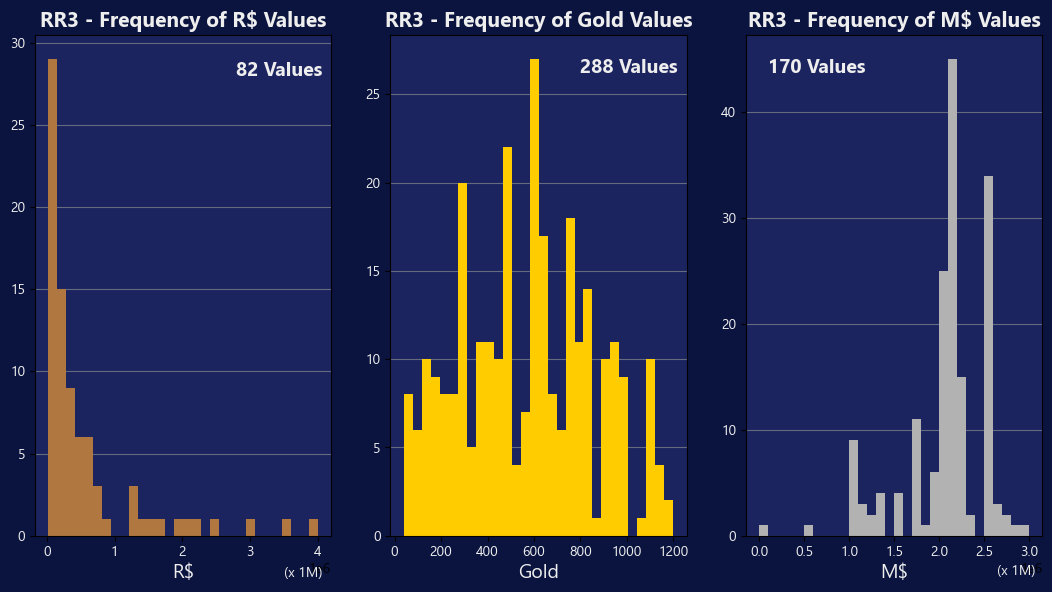

In [24]:
currency_val = {'Rdollar': [], 'Gold': [], 'Mdollar': []}
for val in rr3_df['Price']:
    if 'Rdollar' in val:
        currency_val['Rdollar'].append(int(val[:-8]))
    elif 'Gold' in val:
        currency_val['Gold'].append(int(val[:-5]))
    elif 'Mdollar' in val:
        currency_val['Mdollar'].append(int(val[:-8]))
plt.figure(figsize=(13,6.5))
plt.subplot(1,3,1)
plt.hist(currency_val['Rdollar'], bins=30, color='#b07741', zorder=2)
plt.title('RR3 - Frequency of R\$ Values', fontsize=15, fontweight='bold', color=text_c)
plt.text(2800000, 28.0, "{} Values".format(len(currency_val['Rdollar'])), fontsize=14, fontweight='bold', color=text_c)
plt.text(3500000, -2.5, '(x 1M)', color=text_c)
plt.xlabel('R\$', fontsize=14, color=text_c)
plt.xticks(color=text_c)
plt.yticks(color=text_c)
plt.grid(axis='y', alpha=0.6, color='#999999', zorder=1)
plt.subplot(1,3,2)
plt.hist(currency_val['Gold'], bins=30, color='#ffcc00', zorder=2)
plt.title('RR3 - Frequency of Gold Values', fontsize=15, fontweight='bold', color=text_c)
plt.text(800, 26.2, "{} Values".format(len(currency_val['Gold'])), fontsize=14, fontweight='bold', color=text_c)
plt.xlabel('Gold', fontsize=14, color=text_c)
plt.xticks(color=text_c)
plt.yticks(color=text_c)
plt.grid(axis='y', alpha=0.6, color='#999999', zorder=1)
plt.subplot(1,3,3)
plt.hist(currency_val['Mdollar'], bins=30, color='#b2b2b2', zorder=2)
plt.title('RR3 - Frequency of M\$ Values', fontsize=15, fontweight='bold', color=text_c)
plt.text(100000, 43.7, "{} Values".format(len(currency_val['Mdollar'])), fontsize=14, fontweight='bold', color=text_c)
plt.text(2650000, -3.7, '(x 1M)', color=text_c)
plt.xlabel('M\$', fontsize=14, color=text_c)
plt.xticks(color=text_c)
plt.yticks(color=text_c)
plt.grid(axis='y', alpha=0.6, color='#999999', zorder=1)
plt.show()

**Nice! What can we imply from these three plots above?**

* **R\$:** The dominance of values come from **the very low ones like under 200,000 R\$**, being **close to total of 30**. In a large manner, most of the values belong to those **under 1 million R\$**.
* **Gold:** Over 50 cars should have prices **around 600 Gold**, which has seen the most occurrence; the similar one is to those with **around 500 Gold** and **around 300**. When you look at the shape in general, the values may seem to be distributed somewhat regularly but with high fluctuations, then the overall frequency gets decreased overall as downward direction.
* **M\$:** Lots of values lie to the right side; **nearly than 100 cars** have the value **slightly greater than or equal to 2 million**, where **more than 30 cars** have the price of **2.5 million** (they should be coming from 2020, 2021 & 2022 Season Formula 1 Cars).

## A Different Perspective: ECDF

Why not creating **ECDFs (Empirical Cumulative Distribution Functions)** with the values from car stats of each?

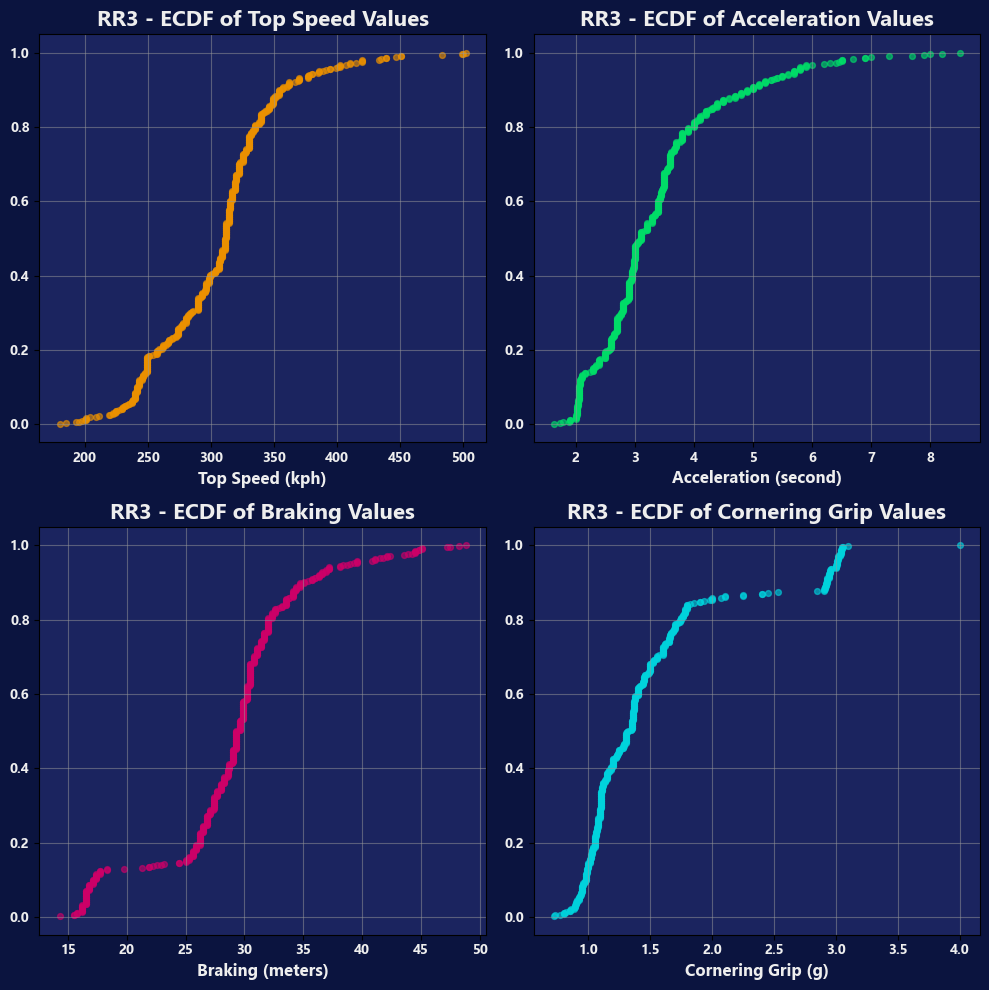

In [25]:
# The main function to create the ECDF
def ECDF(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
x_speed, y_speed = ECDF(rr3_df['Top Speed'])
plt.scatter(x_speed, y_speed, marker='.', color='#ec9100', s=70, alpha=0.6)
plt.title('RR3 - ECDF of Top Speed Values', fontsize=16, fontweight='bold', color=text_c)
plt.xlabel('Top Speed (kph)', fontsize=12, fontweight='bold', color=text_c)
plt.grid(alpha=0.5, color='#999999')
plt.xticks(color=text_c, fontweight='bold')
plt.yticks(color=text_c, fontweight='bold')
plt.subplot(2,2,2)
x_acc, y_acc = ECDF(rr3_df['Acceleration'])
plt.scatter(x_acc, y_acc, marker='.', color='#00dd68', s=70, alpha=0.6)
plt.title('RR3 - ECDF of Acceleration Values', fontsize=16, fontweight='bold', color=text_c)
plt.xlabel('Acceleration (second)', fontsize=12, fontweight='bold', color=text_c)
plt.grid(alpha=0.5, color='#999999')
plt.xticks(color=text_c, fontweight='bold')
plt.yticks(color=text_c, fontweight='bold')
plt.subplot(2,2,3)
x_brake, y_brake = ECDF(rr3_df['Braking'])
plt.scatter(x_brake, y_brake, marker='.', color='#cd0068', s=70, alpha=0.6)
plt.title('RR3 - ECDF of Braking Values', fontsize=16, fontweight='bold', color=text_c)
plt.xlabel('Braking (meters)', fontsize=12, fontweight='bold', color=text_c)
plt.grid(alpha=0.5, color='#999999')
plt.xticks(color=text_c, fontweight='bold')
plt.yticks(color=text_c, fontweight='bold')
plt.subplot(2,2,4)
x_grip, y_grip = ECDF(rr3_df['Grip'])
plt.scatter(x_grip, y_grip, marker='.', color='#00d3dd', s=70, alpha=0.6)
plt.title('RR3 - ECDF of Cornering Grip Values', fontsize=16, fontweight='bold', color=text_c)
plt.xlabel('Cornering Grip (g)', fontsize=12, fontweight='bold', color=text_c)
plt.grid(alpha=0.5, color='#999999')
plt.xticks(color=text_c, fontweight='bold')
plt.yticks(color=text_c, fontweight='bold')
plt.tight_layout()
plt.show()

**Here are the results we can observe from the figure above:**

* Most of the cars have the **TOP SPEED** of between **300 and 350 kph** (pay attention to the density of the dots). Besides, in general, **over 80%** of the cars have **less than 350 kph** top speed.
* For **ACCELERATION**, the related dots rapidly rise up on the left side; **almost 80%** of the cars in the final version of Real Racing 3 have acceleration values being **less than 4 seconds**. Remarkably, some small groups of dots can appear vertically as they have the identical acceleration values.
* Speaking of **BRAKING** values, again an almost-regular distribution of values can be seen, though some disconnections exist. Cars most likely have **around 30 meters** of braking distance. Note the situation in the bottom left; that's because **all Formula 1 cars**, plus a few in the Road Collection, have very stong braking capabilities **(values appearing under 20 meters)**. In contrast, several cars have much worse values than others **(which is over 40 meters)**; and such cars could have very low PR values.
* The distribution of values for **CORNERING GRIP** is somewhat similar to the ones in the acceleration graph. Most cars have between **1.0-1.5 g** cornering capability and the skewness derived from the dots continues until **about 1.8 g**. Again, don't be surprised as **all Formula 1** and similar cars have **between 2.9-3.1 g**, thus the dots gathering around there consequently. Plus, **a big outlier** exists on the rightmost side whose value is exactly **4.0 g**! _(If you'd like to know which one had this extreme value, don't hesitate to check out the previous analysis...)_

All in all, these substantially support the statements we've made for the corresponding **histograms** above...

## PR Against ECDF Values

Can we find any correlation with **PR** values if we combine these ECDFs above?

For this to work, all these values above, including PR, **must be normalized**; between 0.0 and 1.0.

**After that, we come across this output:**

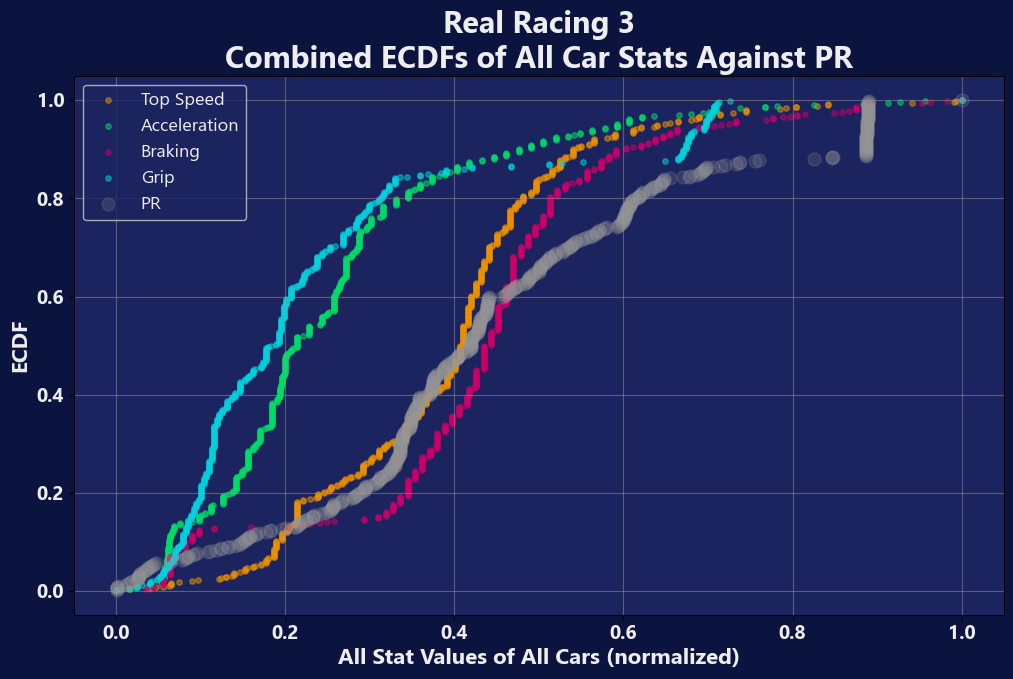

In [26]:
x_pr, y_pr = ECDF(rr3_df['PR'])
x_pr /= x_pr.max()
x_speed = x_speed.astype('float64')
x_speed -= x_speed.min()
x_speed /= x_speed.max()
x_acc -= x_acc.min() 
x_acc /= x_acc.max()
x_brake -= x_brake.min()
x_brake /= x_brake.max()
x_grip -= x_grip.min()
x_grip /= x_grip.max()
plt.figure(figsize=(12,7))
plt.scatter(x_speed, y_speed, marker='.', color='#ec9100', s=60, label='Top Speed', alpha=0.5)
plt.scatter(x_acc, y_acc, marker='.', color='#00dd68', s=60, label='Acceleration', alpha=0.5)
plt.scatter(x_brake, y_brake, marker='.', color='#cd0068', s=60, label='Braking', alpha=0.5)
plt.scatter(x_grip, y_grip, marker='.', color='#00d3dd', s=60, label='Grip', alpha=0.5)
plt.scatter(x_pr, y_pr, marker='.', color='#999999', s=350, label='PR', alpha=0.2)
plt.title('Real Racing 3\nCombined ECDFs of All Car Stats Against PR', fontsize=22, fontweight='bold', color=text_c)
plt.xlabel('All Stat Values of All Cars (normalized)', fontsize=16, fontweight='bold', color=text_c)
plt.ylabel('ECDF', fontsize=16, fontweight='bold', color=text_c)
plt.xticks(fontsize=14, color=text_c, fontweight='bold')
plt.yticks(fontsize=14, color=text_c, fontweight='bold')
plt.legend(fontsize=13, labelcolor=text_c)
plt.grid(alpha=0.5, color='#999999', zorder=1)
plt.show()

After normalizing everything here, I know the graph we encountered here might be weird in the first place! Anyway, let's do our best to interpret from this complicated ECDF plot: 

**From 20% up to about 45%**, the normalized PR values approximate the normalized values of **top speed**, sometimes being exactly on them and sometimes staying so close both at the left or right side. However, **after 45% up to 90%**, the normalized PR values stay as the rightmost one!

From the plot above additionally, the normalized **grip** and **acceleration** values are always on the (highly away) left part of PR **(assume we neglect the first 5%)**. Furthermore, the normalized **braking** values are on the rightmost part **from about 20% to 45%**, then swap position to the left, similar to top speed.

While determining the PR, in my opinion, braking and top speed together seem to have **stronger effects** while, on the other hand, grip and acceleration have **weaker**.

_All in all, it may not be a great method to completely imply the relationships, but it was a nice attempt to get it there, do you agree?_

## Correlations Through All Car Stats

Now I'd like to see the **correlations between these 4 stat groups of values**...

Let's tackle them all by creating plots individually and find their relationships in terms of _positivity_ or _negativity with a solid line:_

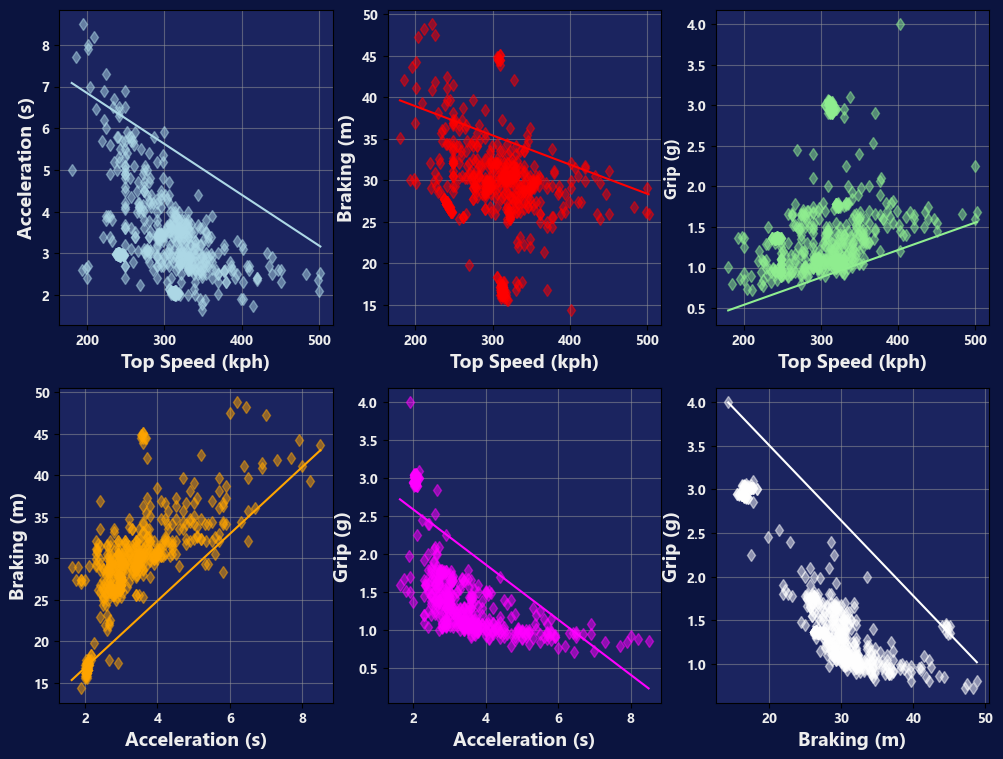

In [27]:
top_speed = rr3_df['Top Speed'].values
acc = rr3_df['Acceleration'].values
braking = rr3_df['Braking'].values
grip = rr3_df['Grip'].values
plt.figure(figsize=(12,9))
plt.subplot(2,3,1)
z = np.polyfit(top_speed, acc, 1)
plt.plot(top_speed, acc, marker='d', linestyle='none', alpha=0.5, color='lightblue')
plt.plot([top_speed.min(), top_speed.max()], [z[1], z[1]+(z[0]*(top_speed.max()-top_speed.min()))], color='lightblue')
plt.xlabel('Top Speed (kph)', fontsize=14, fontweight='bold', color=text_c)
plt.ylabel('Acceleration (s)', fontsize=14, fontweight='bold', color=text_c)
plt.xticks(color=text_c, fontweight='bold')
plt.yticks(color=text_c, fontweight='bold')
plt.grid(alpha=0.5, color='#999999')
plt.subplot(2,3,2)
z = np.polyfit(top_speed, braking, 1)
plt.plot(top_speed, braking, marker='d', linestyle='none', alpha=0.5, color='red')
plt.plot([top_speed.min(), top_speed.max()], [z[1], z[1]+(z[0]*(top_speed.max()-top_speed.min()))], color='red')
plt.xlabel('Top Speed (kph)', fontsize=14, fontweight='bold', color=text_c)
plt.ylabel('Braking (m)', fontsize=14, fontweight='bold', color=text_c)
plt.xticks(color=text_c, fontweight='bold')
plt.yticks(color=text_c, fontweight='bold')
plt.grid(alpha=0.5, color='#999999')
plt.subplot(2,3,3)
z = np.polyfit(top_speed, grip, 1)
plt.plot(top_speed, grip, marker='d', linestyle='none', alpha=0.5, color='lightgreen')
plt.plot([top_speed.min(), top_speed.max()], [z[1], z[1]+(z[0]*(top_speed.max()-top_speed.min()))], color='lightgreen')
plt.xlabel('Top Speed (kph)', fontsize=14, fontweight='bold', color=text_c)
plt.ylabel('Grip (g)', fontsize=12, fontweight='bold', color=text_c)
plt.xticks(color=text_c, fontweight='bold')
plt.yticks(color=text_c, fontweight='bold')
plt.grid(alpha=0.5, color='#999999')
plt.subplot(2,3,4)
z = np.polyfit(acc, braking ,1)
plt.plot(acc, braking, marker='d', linestyle='none', alpha=0.5, color='orange')
plt.plot([acc.min(), acc.max()], [z[1], z[1]+(z[0]*(acc.max()-acc.min()))], color='orange')
plt.xlabel('Acceleration (s)', fontsize=14, fontweight='bold', color=text_c)
plt.ylabel('Braking (m)', fontsize=14, fontweight='bold', color=text_c)
plt.xticks(color=text_c, fontweight='bold')
plt.yticks(color=text_c, fontweight='bold')
plt.grid(alpha=0.5, color='#999999')
plt.subplot(2,3,5)
z = np.polyfit(acc, grip, 1)
plt.plot(acc, grip, marker='d', linestyle='none', alpha=0.5, color='#ff00ff')
plt.plot([acc.min(), acc.max()], [z[1], z[1]+(z[0]*(acc.max()-acc.min()))], color='#ff00ff')
plt.xlabel('Acceleration (s)', fontsize=14, fontweight='bold', color=text_c)
plt.ylabel('Grip (g)', fontsize=14, fontweight='bold', color=text_c)
plt.xticks(color=text_c, fontweight='bold')
plt.yticks(color=text_c, fontweight='bold')
plt.grid(alpha=0.5, color='#999999')
plt.subplot(2,3,6)
z = np.polyfit(braking, grip, 1)
plt.plot(braking, grip, marker='d', linestyle='none', alpha=0.5, color='white')
plt.plot([braking.min(), braking.max()], [z[1], z[1]+(z[0]*(braking.max()-braking.min()))], color='white')
plt.xlabel('Braking (m)', fontsize=14, fontweight='bold', color=text_c)
plt.ylabel('Grip (g)', fontsize=14, fontweight='bold', color=text_c)
plt.xticks(color=text_c, fontweight='bold')
plt.yticks(color=text_c, fontweight='bold')
plt.grid(alpha=0.5, color='#999999')
plt.show()

_**It is awesome to examine all these correlations in just one plotting group, isn't it?**_ 

Together with these, let's get the **correlation coefficients (Pearson)** in numerical way:

In [28]:
tspeed_values = rr3_df['Top Speed'].values
acc_values = rr3_df['Acceleration'].values
brake_values = rr3_df['Braking'].values
grip_values = rr3_df['Grip'].values
print("#### CORRELATIONS ####")
print("Top Speed vs Acceleration: {:10.5f}".format(np.corrcoef(tspeed_values, acc_values)[0,1]))
print("Top Speed vs Braking:      {:10.5f}".format(np.corrcoef(tspeed_values, brake_values)[0,1]))
print("Top Speed vs Grip:         {:10.5f}".format(np.corrcoef(tspeed_values, grip_values)[0,1]))
print("Acceleration vs Braking:   {:10.5f}".format(np.corrcoef(acc_values, brake_values)[0,1]))
print("Acceleration vs Grip:      {:10.5f}".format(np.corrcoef(acc_values, grip_values)[0,1]))
print("Braking vs Grip:           {:10.5f}".format(np.corrcoef(brake_values, grip_values)[0,1]))

#### CORRELATIONS ####
Top Speed vs Acceleration:   -0.52665
Top Speed vs Braking:        -0.27605
Top Speed vs Grip:            0.25956
Acceleration vs Braking:      0.73221
Acceleration vs Grip:        -0.64178
Braking vs Grip:             -0.84248


_**Compare both the values here and the corresponding plots, including the lines going upward or downward. Consequently, they mutually look very logical, don't they?**_

It is definitely right to say that _Top Speed & Acceleration_ are **negatively correlated** with a magnitude of **-0.526**, with regards to the numerical values. That is, if a car can reach **higher top speed**, it is expected to have **faster acceleration**, thus **lower values**. _This is the most accurate claim we can get..._

Similarly, _Top Speed & Braking,_ _Acceleration & Grip_ and _Braking & Grip_ are also **negatively correlated** with different magnitudes as seen above. (Respective values are **-0.276**, **-0.641**, **-0.842**)

On the other hand, these two pairs are **positively correlated**: _Top Speed & Grip_ and _Acceleration & Braking_ with magnitude of **0.260** and **0.732**, respectively. So, if one value is increasing, then it is expected for the other one to go up, where greater effect can be seen for the second pair.

## Correlations with Heat Map

Now, can we consolidate everything such that their correlations are packed together and color-coded?

**Heat map** visualization will help us substantially for that! This time, we include three additional columns: **PR**, **Service Cost** and **Service Time**.

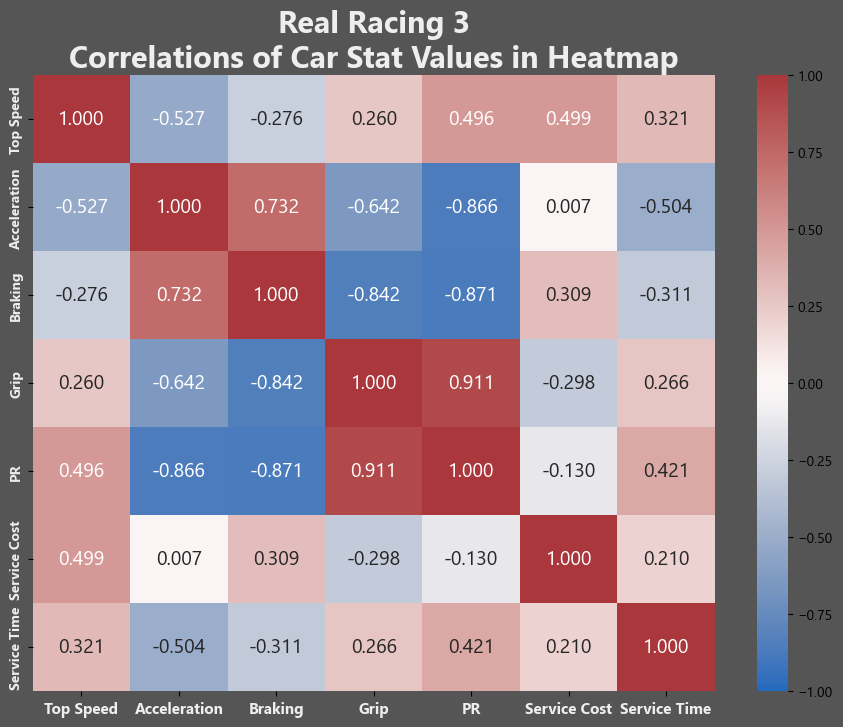

In [29]:
rr3_df_car_values = rr3_df[['Top Speed', 'Acceleration', 'Braking', 'Grip', 'PR', 'Service Cost', 'Service Time']]
plt.rcParams['figure.facecolor'] = '#555555'
plt.figure(figsize=(11,8))
# sns.set(font_scale=1.25)
sns.heatmap(rr3_df_car_values.corr(), cmap='vlag', annot=True, annot_kws={'fontsize':14}, vmin=-1, vmax=1, fmt='.3f')
plt.title('Real Racing 3\nCorrelations of Car Stat Values in Heatmap', fontsize=22, fontweight='bold', color=text_c)
plt.xticks(color=text_c, fontsize=11, fontweight='bold')
plt.yticks(color=text_c, fontsize=10, fontweight='bold')
plt.show()

**Excellent!** All these correlation values are beautifully here together in **a heat map**!

The first 4 rows and columns (i.e. horizontally and vertically) **should be exactly the same** with the values we calculated above. Plus, inspect the added rows and columns (PR, Service Cost & Service Time) in terms of their correlations against the existing ones...

Interestingly, **PR** has **much higher** correlation magnitudes especially when compared to _Acceleration,_ _Braking_ and _Grip;_ being close to **0.9** both positively and negatively.

## Box Plots

Finally, I want to generate some **box plots**, seperated by **the car classes**.

Let's see the **mean**, **median**, **quantiles** and **possible outliers** of these columns visually:

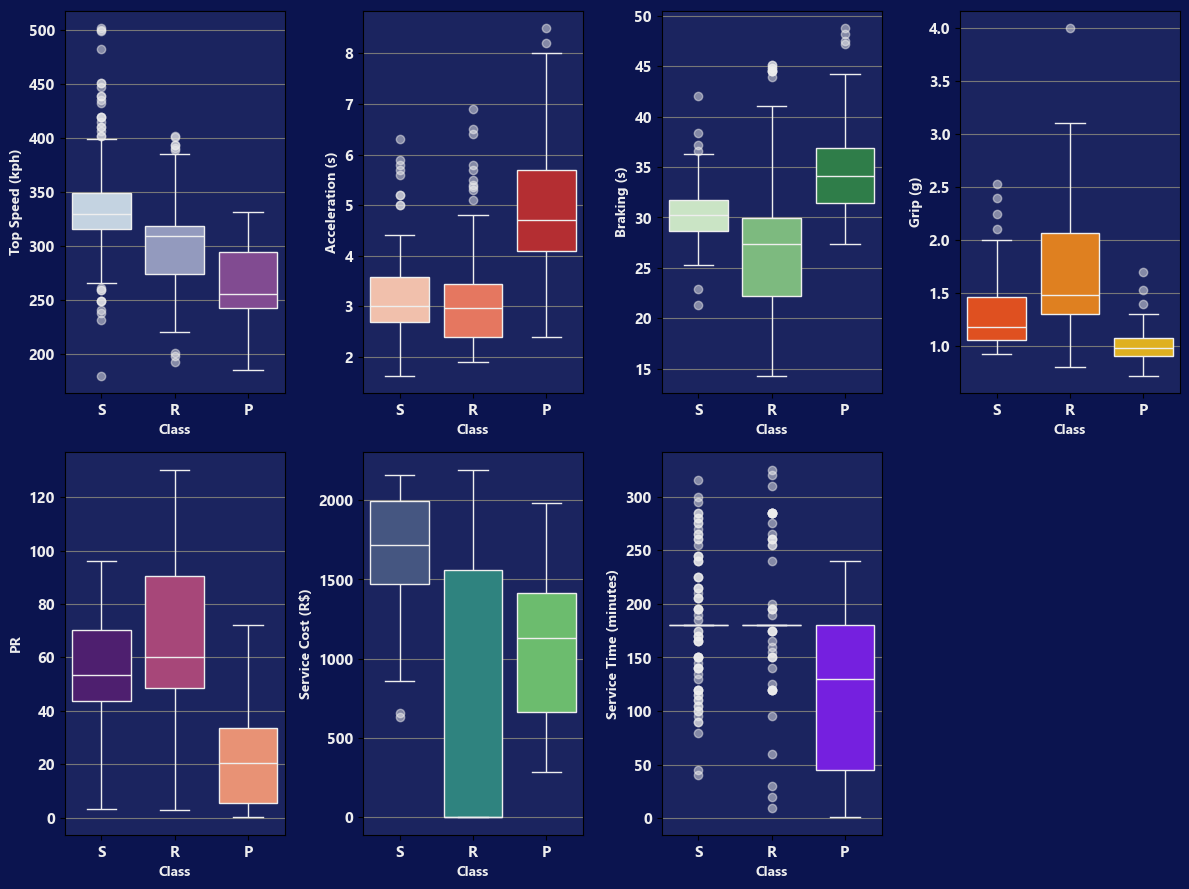

In [30]:
plt.rcParams['figure.facecolor'] = '#0b144f'
def create_boxplot(label1, label2, palette, xlbl, ylbl):
    sns.boxplot(x=rr3_df[label1], y=rr3_df[label2], palette=palette, boxprops={'edgecolor': text_c}, 
            medianprops={'color': text_c}, whiskerprops={'color': text_c}, capprops={'color': text_c}, 
            flierprops={'markerfacecolor': text_c, 'markeredgecolor': text_c, 'alpha': 0.5})
    plt.xlabel(xlbl, fontweight='bold', color=text_c)
    plt.ylabel(ylbl, fontweight='bold', color=text_c)
    plt.xticks(color=text_c)
    plt.yticks(color=text_c, fontsize=12)
    plt.grid(axis='y', color='#777777')
    
plt.figure(figsize=(12,9))
plt.subplot(2,4,1)
create_boxplot('Class','Top Speed','BuPu','Class','Top Speed (kph)')
plt.xticks(fontsize=11, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.subplot(2,4,2)
create_boxplot('Class','Acceleration','Reds','Class','Acceleration (s)')
plt.xticks(fontsize=11, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.subplot(2,4,3)
create_boxplot('Class','Braking','Greens','Class','Braking (s)')
plt.xticks(fontsize=11, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.subplot(2,4,4)
create_boxplot('Class','Grip','autumn','Class','Grip (g)')
plt.xticks(fontsize=11, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.subplot(2,4,5)
create_boxplot('Class','PR','magma','Class','PR')
plt.xticks(fontsize=11, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.subplot(2,4,6)
create_boxplot('Class','Service Cost','viridis','Class','Service Cost (R\$)')
plt.xticks(fontsize=11, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.subplot(2,4,7)
create_boxplot('Class','Service Time','hsv','Class','Service Time (minutes)')
plt.xticks(fontsize=11, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.tight_layout()
plt.show()

These box plots should give **much more valuable insights** and the separation by classes enabled us to identify the characteristics of cars in Real Racing 3 much more! **Awesome!**

Let me tell you what these lines in and out of these boxes and those large dots mean, with respect to data science terminology:

- The horizontal bottommost line outside of the colored box represents the **minimum confidence interval** value.
- The horizontal bottom line within the colored box represents the **25th percentile** value.
- The horizontal middle line within the colored box represents the **median** value (50th percentile).
- The horizontal top line within the colored box represents the **75th percentile** value.
- The horizontal topmost line outside of the colored box represents the **maximum confidence interval** value.
- And, the filled white circles (fliers) are **outliers**!

We can come across many outliers out there especially with these combinations, as examples: _Top Speed of S-class,_  _Acceleration of S-class,_ _Acceleration of R-class,_ _Braking of S-class,_ _Service Time of S-class,_ _Service Time of R-class_

Well, **Service Time of R-class & S-class** have the most outliers among all here! That might be because **180-minute** service time duration is highly dominant across all cars, hence no confidence interval can be seen there and any other values were marked as outliers!

Conversely, there has been no outliers emerged for **PR** feature! We can say that all values lied there are within the defined confidence interval values.

Plus, the corresponding figure for **Service Cost has no outlier** in R and P class, but S class has a few. In addition, the R-class' colored box is so big, and it contains every other values whatsoever. That should be because most of the values are **0**, i.e. being free to service.

## All right, everyone! That concludes the 3rd Part of Data Analysis for Real Racing 3 Cars!

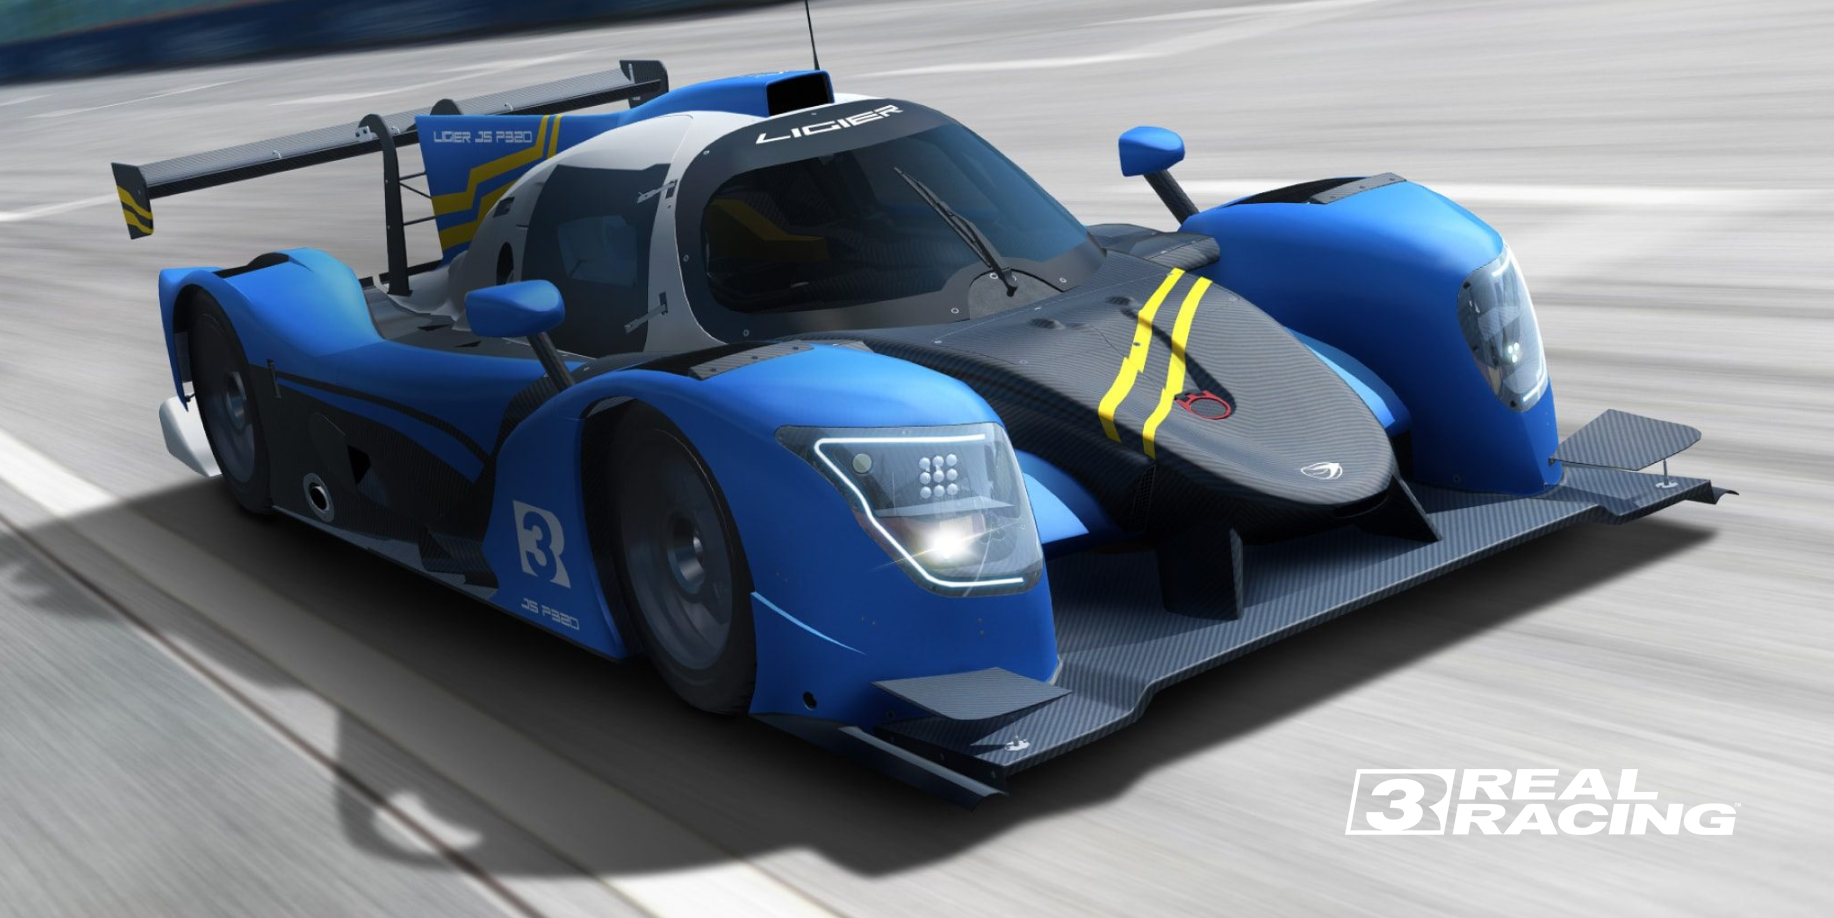

### All in all, we put the emphasis on data visualization here.

### I hope you enjoyed a lot while observing the plots and reading the analyses.

# **AS ALWAYS, KEEP RACING UNTIL THE SHUTDOWN!!**